# Auto-Mpg Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

columns = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
    'model year', 'origin', 'car name'
]
cars = pd.read_table('./resources/auto-mpg.data',delim_whitespace=True,names = columns)
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


Observations:

* All records have 398 values.
* Cols horsepower and car name has datatypes as object, but in the about sample data we can horsepower is numeric value. So lets check

In [2]:
cars['horsepower'] = pd.to_numeric(cars['horsepower'], errors = 'coerce')
cars = cars[np.isfinite(cars['horsepower'])]

### Data Analysis
In data, it's always about seeing is believing and the best way to see the data is using plots.

We shall do this data analysis in two stages. In stage 1, I want to see how the data looks like for each columns with out connecting to other informations. This will helps us to understand following questions

* What kind mpg/horsepower/cylinders of the car models are being released into the marked?

* In second stage, we will try to see the correlations between these individual features,Does difference in mpg/horsepower/cylinders has an effect on mpg/horsepower/cylinders?

car name


/Users/jkchang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


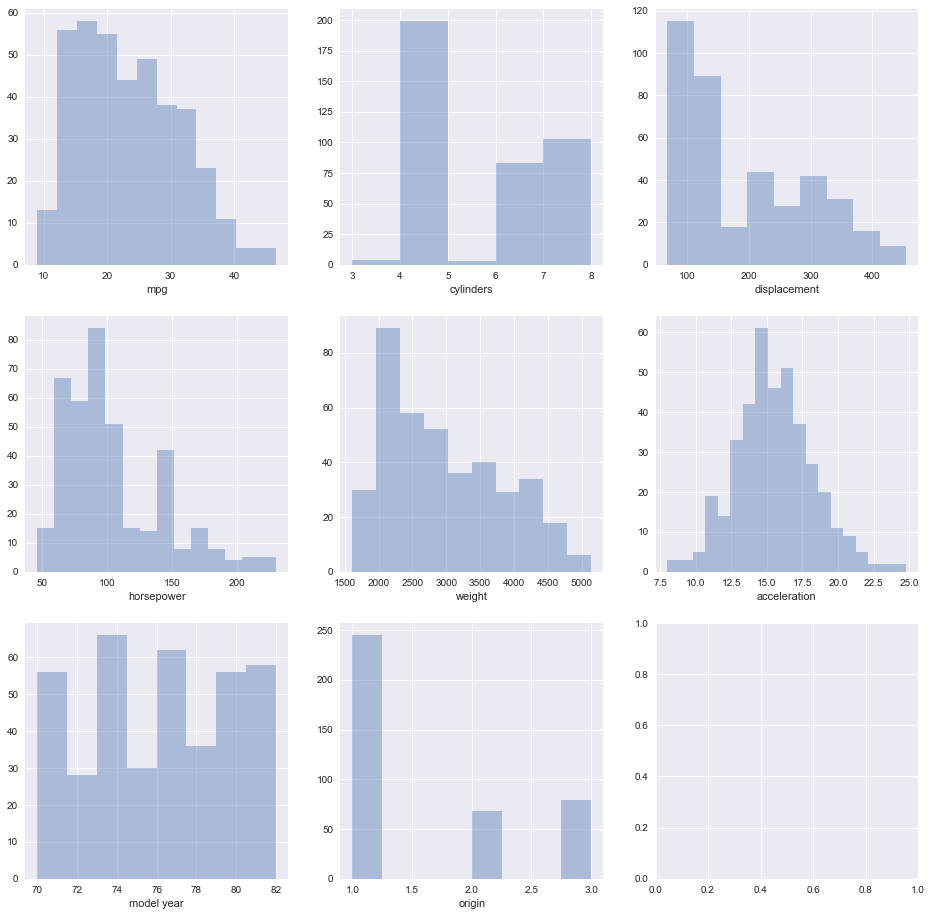

In [3]:
tmp = plt.subplots(3, 3, figsize=(16, 16))
tmp = tmp[1].flatten().tolist()
for i, col in enumerate(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                         'acceleration', 'model year', 'origin', 'car name']):
    try:
        sns.distplot(cars[col], kde=False, ax=tmp[i])
    except:
        print(col);

/Users/jkchang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


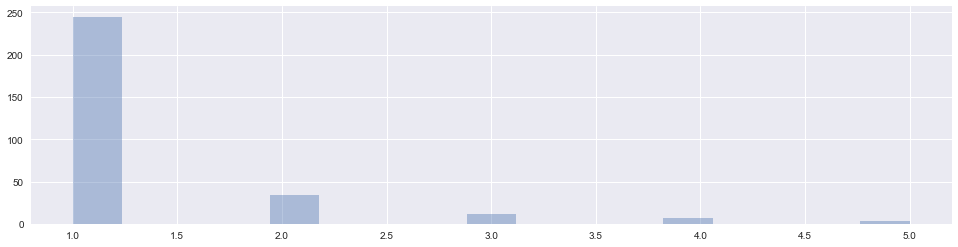

In [4]:
plt.figure(figsize=(16.5, 4))
sns.distplot(cars['car name'].value_counts().values, kde=False)

As you can see, most the car names, we have in our raw data frame are unique.

* There 241 unique car name, with only 1 record.
* There 035 car names with 2 records(per model)
* There 012 car names with 3 records(per model)
* There 006 car names with 4 records(per model)
* There 003 car names with 5 records(per model)


In [5]:
from collections import Counter
Counter(cars['car name'].value_counts().values)

Counter({5: 3, 4: 7, 3: 12, 2: 34, 1: 245})

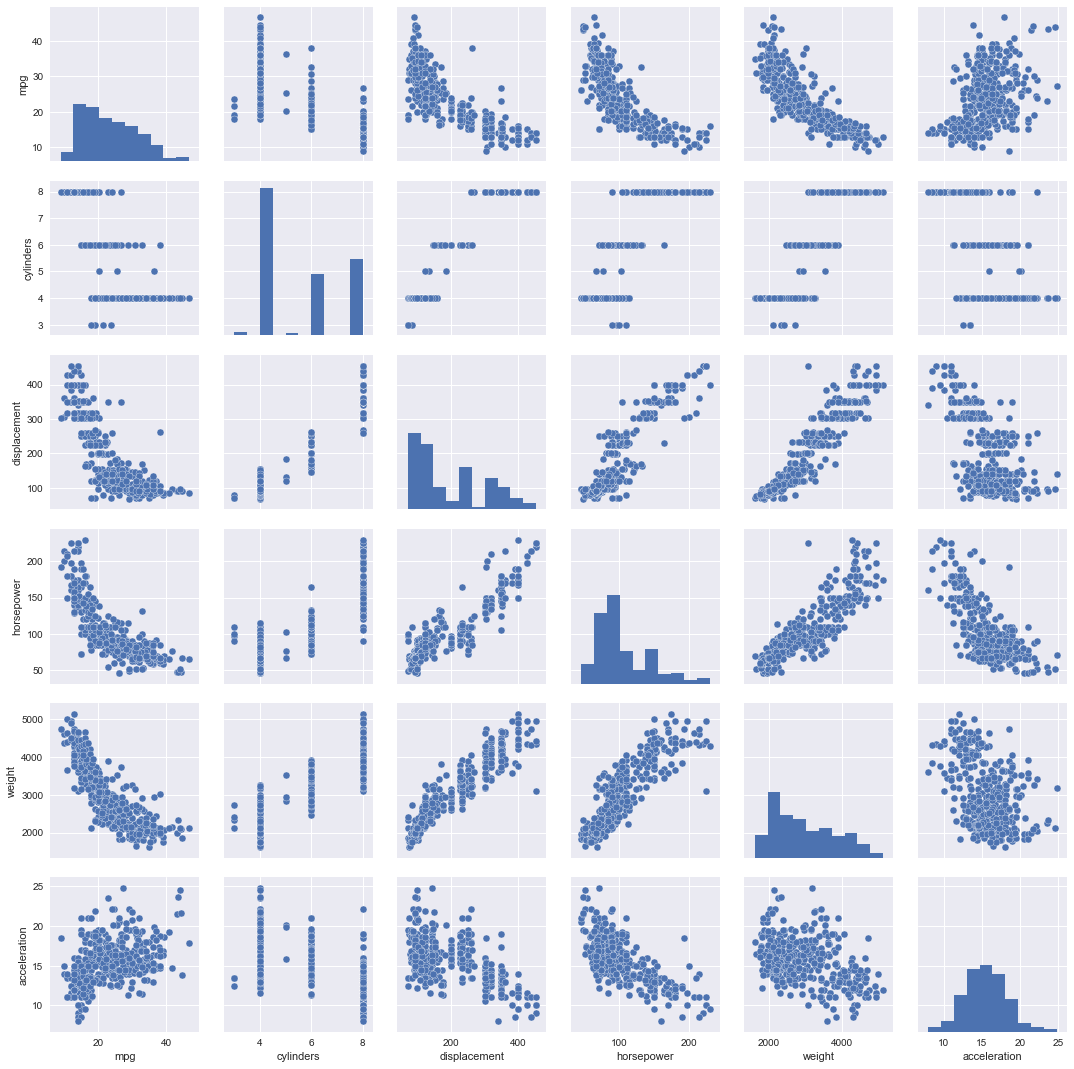

In [6]:
cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
sns.pairplot(cars[cols])

Observation

* mpg seems to have negitive correlation displacement, horsepower & weight.
* displacement seems to have positive correlation horsepower & weight.

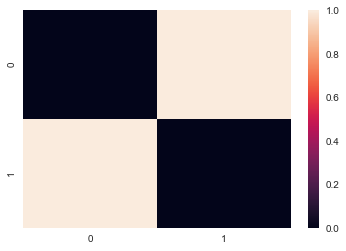

In [7]:
sns.heatmap([[0, 1], [1, 0]])

In [8]:
cars.mpg.corr(-1 * cars.mpg), cars.mpg.corr(-1 * cars.mpg)

(-1.0, -1.0)

In [9]:
cols_corr_matrix = [[cars[col].corr(cars[_]) for _ in cols] for col in cols]

cols_corr_matrix = pd.DataFrame(cols_corr_matrix, index=cols, columns=cols)

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


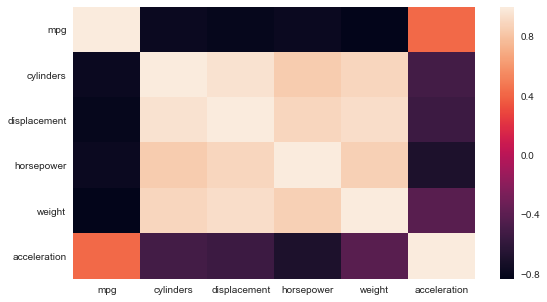

In [10]:
plt.figure(figsize=(9, 5))
sns.heatmap(cols_corr_matrix)
cols_corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,0.000000,-0.777618,-0.805127,-0.778427,-0.832244,0
cylinders,-0.777618,0.000000,0.950823,0.842983,0.897527,0
displacement,-0.805127,0.950823,0.000000,0.897257,0.932994,0
horsepower,-0.778427,0.842983,0.897257,0.000000,0.864538,0
weight,-0.832244,0.897527,0.932994,0.864538,0.000000,0
acceleration,0.000000,0.000000,0.000000,0.000000,0.000000,0


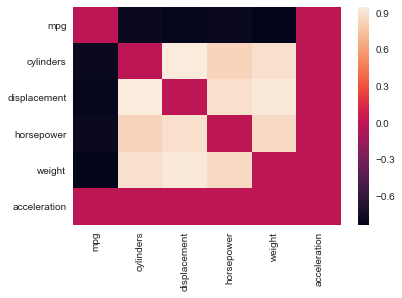

In [11]:
# Let check those correlations that can have impact.
#  I am taking a benchmark of .8 => it means something like 80% of time a change in `x` effects changes in `y` 

effective_cols_corr_matrix = cols_corr_matrix.applymap(lambda x: x if ((x < -0.7) or (x > .7)) and (x < .999) else 0)

sns.heatmap(effective_cols_corr_matrix)
effective_cols_corr_matrix

Notes:

black - Negitive correlation; white - Postive correlation

* Accelation of a vehicle models is an independent of other.

  `Example: A lower weight & low Horsepower Vehicle model can give same acceleration as high Weight, high Horsepower and vice-versa.`
  
* As number of Cylinder/Horsepower increase, we can positive impact/increase in Horsepower/Cylinder and weight.

  `Example:I guess we can say that people/user who like to travel more, prefer vehicle models with more Horsepower/Cylinders.`
  
* Mileage/Weight is generally a tradeoff of Cylinder/Horsepower.

  `Example: We can say that Mileage car models, generally prefered to short distances and tend to have lower weight along with low Horsepower.`

In [12]:
import sklearn.cluster
clf = sklearn.cluster.KMeans(n_clusters=8)
clf = clf.fit(cars[cols])

cars['cluster'] = clf.predict(cars[cols])

/Users/jkchang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jkchang/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/jkchang/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/jkchang/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


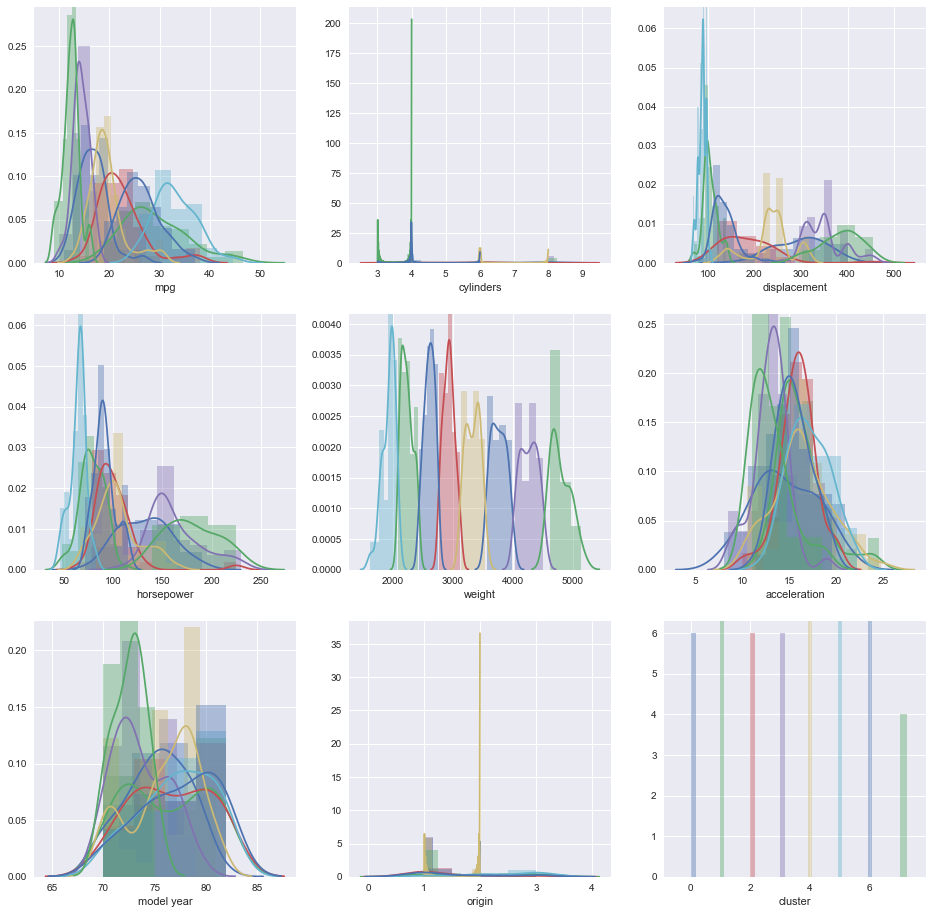

In [13]:
tmp = plt.subplots(3, 3, figsize=(16, 16))
tmp = tmp[1].flatten().tolist()
for i, col in enumerate(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                         'acceleration',
                         'model year', 'origin',
                         'cluster'
                        ]):
    try:
        for cluter_i in range(len(clf.cluster_centers_)):
            sns.distplot(cars[cars.cluster == cluter_i][col], hist=True, ax=tmp[i])
    except:
        print(col)

/Users/jkchang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


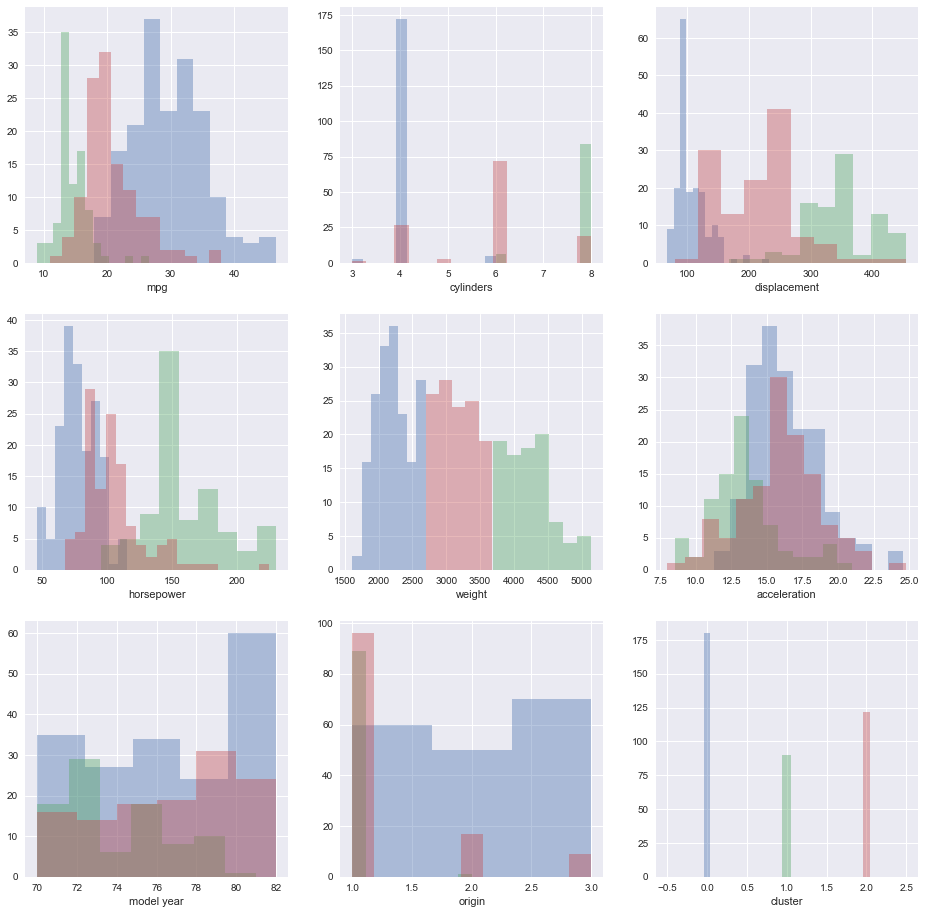

In [14]:
clf = sklearn.cluster.KMeans(n_clusters=3)
clf = clf.fit(cars[cols])
cars['cluster'] = clf.predict(cars[cols])

tmp = plt.subplots(3, 3, figsize=(16, 16))
tmp = tmp[1].flatten().tolist()
for i, col in enumerate(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
                         'acceleration',
                         'model year', 'origin',
                         'cluster'
                        ]):
    try:
        for cluter_i in range(len(clf.cluster_centers_)):
            sns.distplot(cars[cars.cluster == cluter_i][col], hist=True, ax=tmp[i], kde=False)
    except:
        print(col)